In [1]:
shhh <- function(expr) suppressPackageStartupMessages(suppressWarnings(suppressMessages(expr)))
shhh({
    library(magrittr); library(zeallot); library(glue); library(tidyverse); library(glue); library(lubridate)
    library(scales);library(reshape2); library(RColorBrewer); library(ggthemes); 
})

In [2]:
file <- "metrics/metrics.tsv"
metrics <- read.csv(file, sep = '\t')
metrics$month <- as.Date(metrics$month, format = "%Y-%m-%d")

In [3]:
tail(metrics)

,month,structured_data_used,num_commons_files_used_content_pages,wikidata_items,wikidata_items_being_reused
,<date>,<dbl>,<dbl>,<dbl>,<dbl>
10,2021-04-01,115768032,32439596,93039049,19175909
11,2021-05-01,117023506,33188319,93295754,19272296
12,2021-06-01,117956153,33484828,93525712,19379045
13,2021-07-01,118873343,33853754,93808863,19464104
14,2021-08-01,120411293,35339547,94347261,19540328
15,2021-09-01,121413643,35748687,94646283,19640044


## structured data

In [4]:
sd_fy <- metrics %>% 
     select(month,structured_data_used) %>%
     mutate(fiscal_year = ifelse(month >= '2019-07-01' & month < '2020-07-01', 'FY 2019/20', ifelse(month <'2019-07-01','FY 2018/19',ifelse(month <'2021-07-01','FY 2020/21','FY 2021/22'))),
           MonthN =as.factor(format(as.Date(month),"%m")),
         Month = months(as.Date(month), abbreviate=TRUE))

sd_fy$MonthN = factor(sd_fy$MonthN, levels=c("07","08", "09", "10", "11", "12", "01", "02", "03", "04", "05", "06"))

In [5]:
tail(sd_fy)

,month,structured_data_used,fiscal_year,MonthN,Month
,<date>,<dbl>,<chr>,<fct>,<chr>
10,2021-04-01,115768032,FY 2020/21,04,Apr
11,2021-05-01,117023506,FY 2020/21,05,May
12,2021-06-01,117956153,FY 2020/21,06,Jun
13,2021-07-01,118873343,FY 2021/22,07,Jul
14,2021-08-01,120411293,FY 2021/22,08,Aug
15,2021-09-01,121413643,FY 2021/22,09,Sep


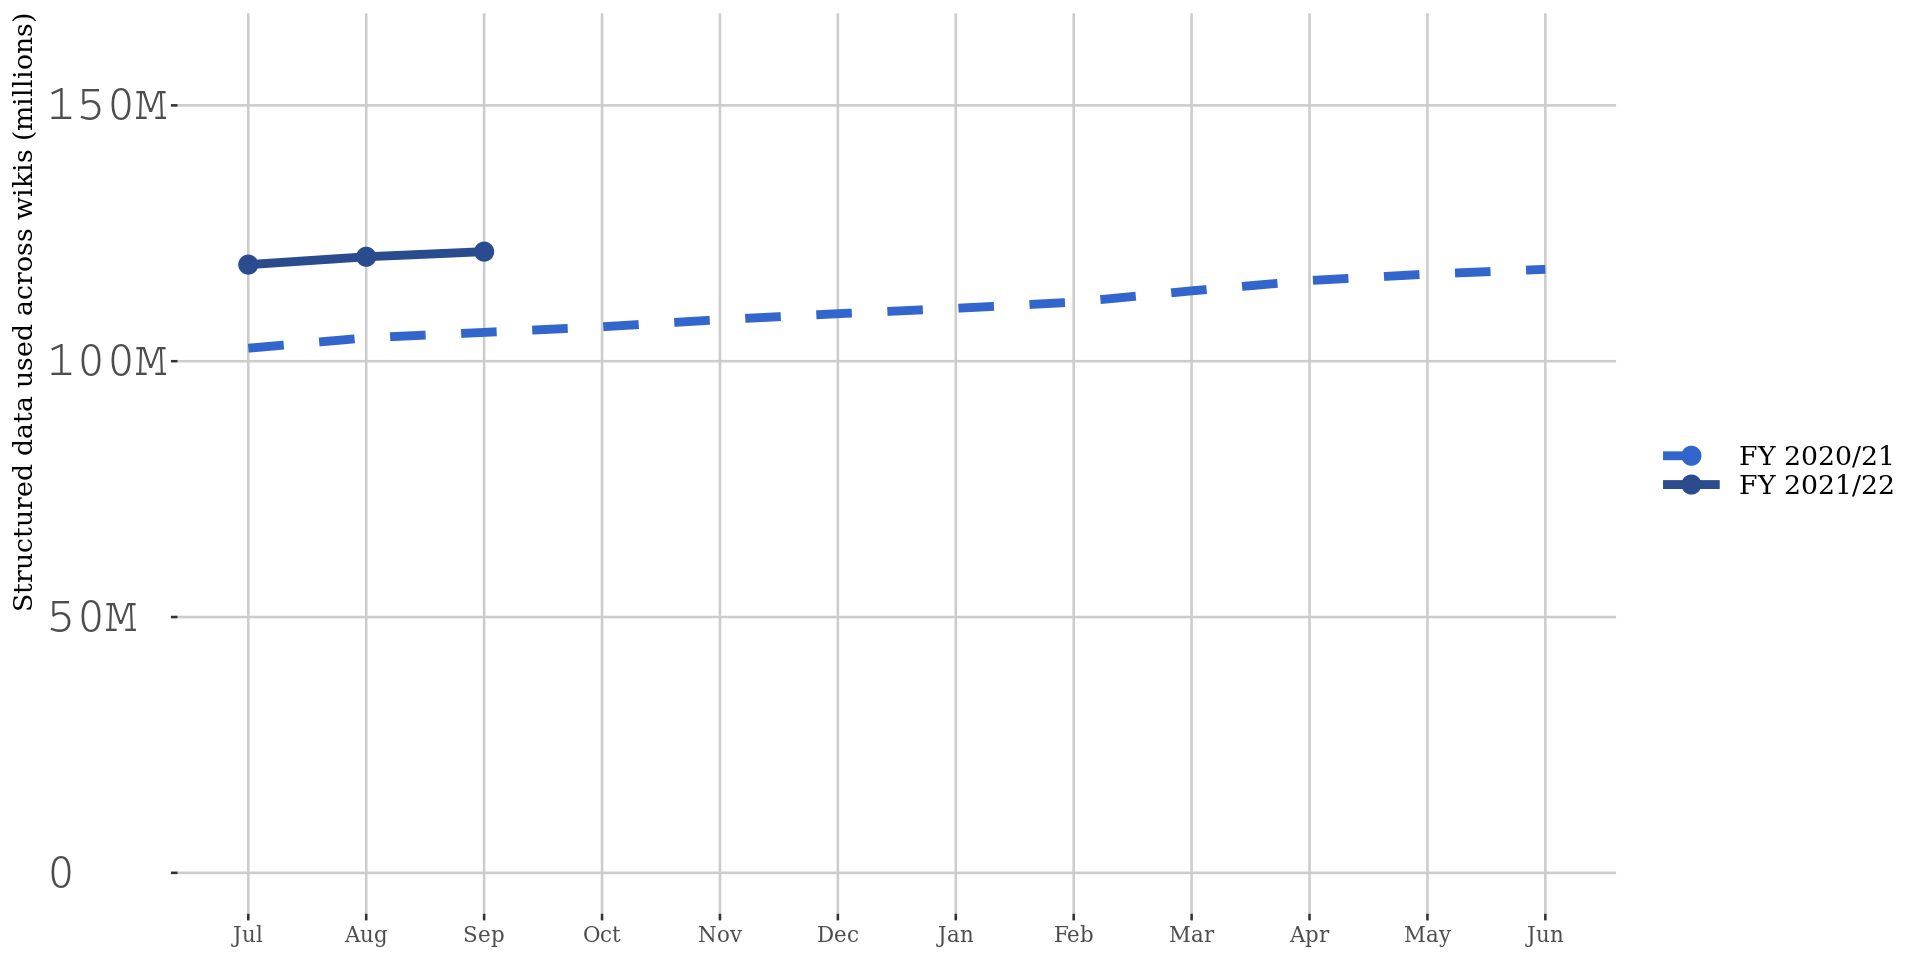

In [6]:
options(repr.plot.width = 16, repr.plot.height = 8)

p<- sd_fy %>%
    ggplot(aes(x = MonthN)) +
    geom_line(aes(x = MonthN, y = structured_data_used, group=fiscal_year, color = fiscal_year,size=fiscal_year,linetype = fiscal_year))+
    geom_point(aes
               (
                   x = MonthN, 
                   y = structured_data_used,
                   color = fiscal_year),
               size = 5,
               #color ="#2a4b8d"
               data = filter(sd_fy, fiscal_year =="FY 2021/22")
              ) +
    scale_linetype_manual(values=c(#"FY 2019/20" = "twodash", 
                                    "FY 2020/21" = "dashed", "FY 2021/22" ="solid")) +
    scale_size_manual(values = c(2.5,2.5,2.5)) +
    scale_color_manual(values = c(#"FY 2019/20"= "#b1c4eb", 
                                "FY 2020/21" = "#3366cc","FY 2021/22" = "#2a4b8d")) +
    scale_x_discrete("Month",
                      breaks = sd_fy$MonthN, 
                     labels = sd_fy$Month) +
    scale_y_continuous("Structured data used across wikis (millions)",
                       labels = polloi::compress,
                       limits = c(0E7,16E7)) +
    ggthemes::theme_tufte(base_size = 16,base_family = "serif") +


     theme(axis.text.y=element_text( hjust = 0,size = 30,family="Courier"),
          axis.title.x=element_blank(),
          panel.grid = element_line("gray80"),
          plot.title = element_text(size = 20,hjust = 0,face= "bold"),
          axis.title=element_text(size=16,hjust = 1),
          legend.position = "right", 
          panel.grid.minor.y = element_blank(),
          legend.title = element_blank(),
          legend.text =element_text( hjust = 0.5,size = 16),
          legend.key.width=unit(1.5,"cm"))
  


#ggsave(filename="Pageviews_monthly_yoy2.png", plot = p, path = 'Figures', units = "in", dpi = 192, height = 6, width = 14, limitsize = FALSE)  
p

## Non-text content used across wikis


In [7]:
com_fy <- metrics %>% 
     select(month,num_commons_files_used_content_pages) %>%
     mutate(fiscal_year = ifelse(month >= '2019-07-01' & month < '2020-07-01', 'FY 2019/20', ifelse(month <'2019-07-01','FY 2018/19',ifelse(month <'2021-07-01','FY 2020/21','FY 2021/22'))),
           MonthN =as.factor(format(as.Date(month),"%m")),
         Month = months(as.Date(month), abbreviate=TRUE))

com_fy$MonthN = factor(com_fy$MonthN, levels=c("07","08", "09", "10", "11", "12", "01", "02", "03", "04", "05", "06"))

In [8]:
tail(com_fy)

,month,num_commons_files_used_content_pages,fiscal_year,MonthN,Month
,<date>,<dbl>,<chr>,<fct>,<chr>
10,2021-04-01,32439596,FY 2020/21,04,Apr
11,2021-05-01,33188319,FY 2020/21,05,May
12,2021-06-01,33484828,FY 2020/21,06,Jun
13,2021-07-01,33853754,FY 2021/22,07,Jul
14,2021-08-01,35339547,FY 2021/22,08,Aug
15,2021-09-01,35748687,FY 2021/22,09,Sep


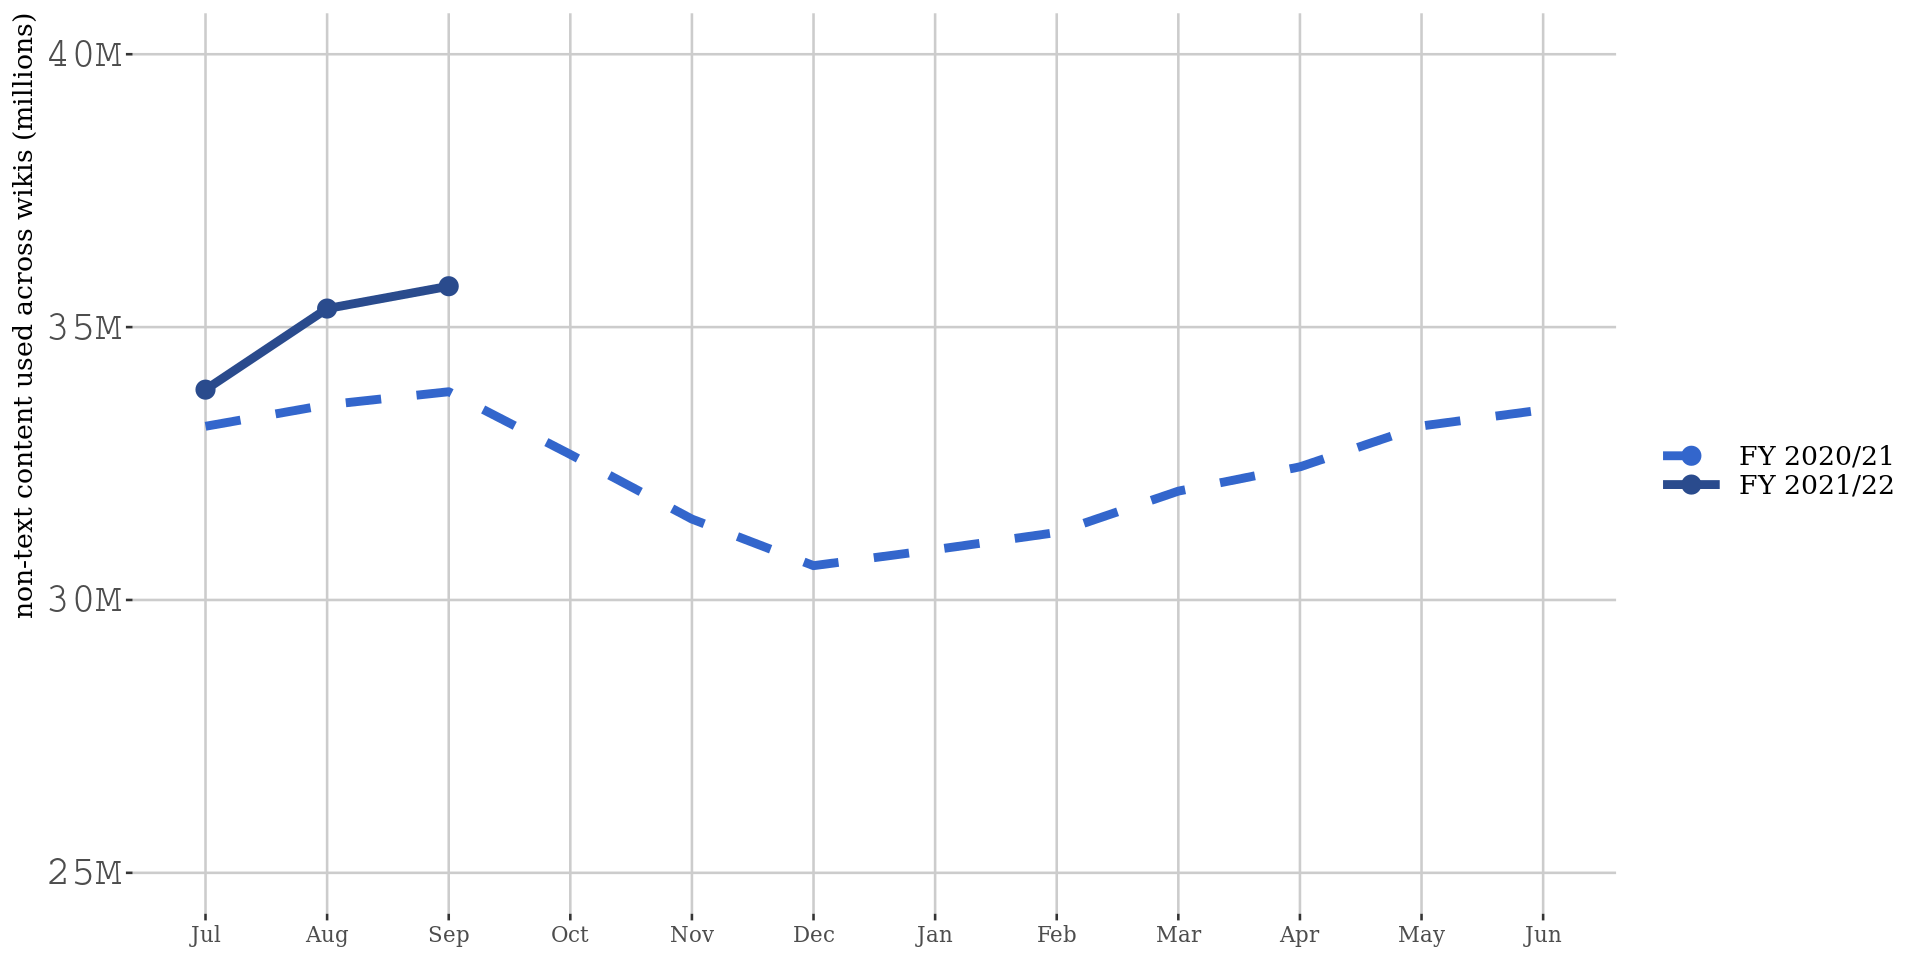

In [9]:
options(repr.plot.width = 16, repr.plot.height = 8)

p<- com_fy %>%
    ggplot(aes(x = MonthN)) +
    geom_line(aes
              (
                x = MonthN, 
                y = num_commons_files_used_content_pages, 
                group = fiscal_year, 
                color = fiscal_year,
                size = fiscal_year,
                linetype = fiscal_year)
             )+
    geom_point(aes
               (
                   x = MonthN, 
                   y = num_commons_files_used_content_pages,
                   color = fiscal_year),
               size = 5,
               #color ="#2a4b8d"
               data = filter(com_fy, fiscal_year =="FY 2021/22")
              ) +
 # scale_linetype_manual(values=c("twodash", "dashed","solid")) +
    scale_linetype_manual(values=c(#"FY 2019/20" = "twodash", 
                                   "FY 2020/21" = "dashed", "FY 2021/22" ="solid")) +
    scale_size_manual(values = c(2.5,2.5,2.5)) +
    scale_color_manual(values = c(#"FY 2019/20"= "#b1c4eb", 
                                  "FY 2020/21" = "#3366cc","FY 2021/22" = "#2a4b8d")) +
    scale_x_discrete("Month",
                      breaks = com_fy$MonthN, 
                     labels = com_fy$Month) +
    scale_y_continuous("non-text content used across wikis (millions)",
                       labels = polloi::compress,
                       limits = c(2.5E7,4.0E7)) +
    ggthemes::theme_tufte(base_size = 16,base_family = "serif") +
     
     theme(axis.text.y=element_text( hjust = 0,size = 25,family="Courier"),
          axis.title.x=element_blank(),
          panel.grid = element_line("gray80"),
          plot.title = element_text(size = 20,hjust = 0,face= "bold"),
          axis.title=element_text(size=16,hjust = 1),
          legend.position = "right", 
          panel.grid.minor.y = element_blank(),
          legend.title = element_blank(),
          legend.text =element_text( hjust = 0.5,size = 16),
          legend.key.width=unit(1.5,"cm")
          )
  

#ggsave(filename="Pageviews_monthly_yoy2.png", plot = p, path = 'Figures', units = "in", dpi = 192, height = 6, width = 14, limitsize = FALSE)  
p

## Wikidata items reused on other Wikimedia projects

In [10]:
wd_fy <- metrics %>% 
     select(month,wikidata_items,wikidata_items_being_reused) %>%
     mutate(per = wikidata_items_being_reused/wikidata_items) %>%
     mutate(fiscal_year = ifelse(month >= '2019-07-01' & month < '2020-07-01', 'FY 2019/20', ifelse(month <'2019-07-01','FY 2018/17',ifelse(month <'2021-07-01','FY 2020/21','FY 2021/22'))),
           MonthN =as.factor(format(as.Date(month),"%m")),
         Month = months(as.Date(month), abbreviate=TRUE))

wd_fy$MonthN = factor(wd_fy$MonthN, levels=c("07","08", "09", "10", "11", "12", "01", "02", "03", "04", "05", "06"))

Warning message:
“Removed 1 row(s) containing missing values (geom_path).”


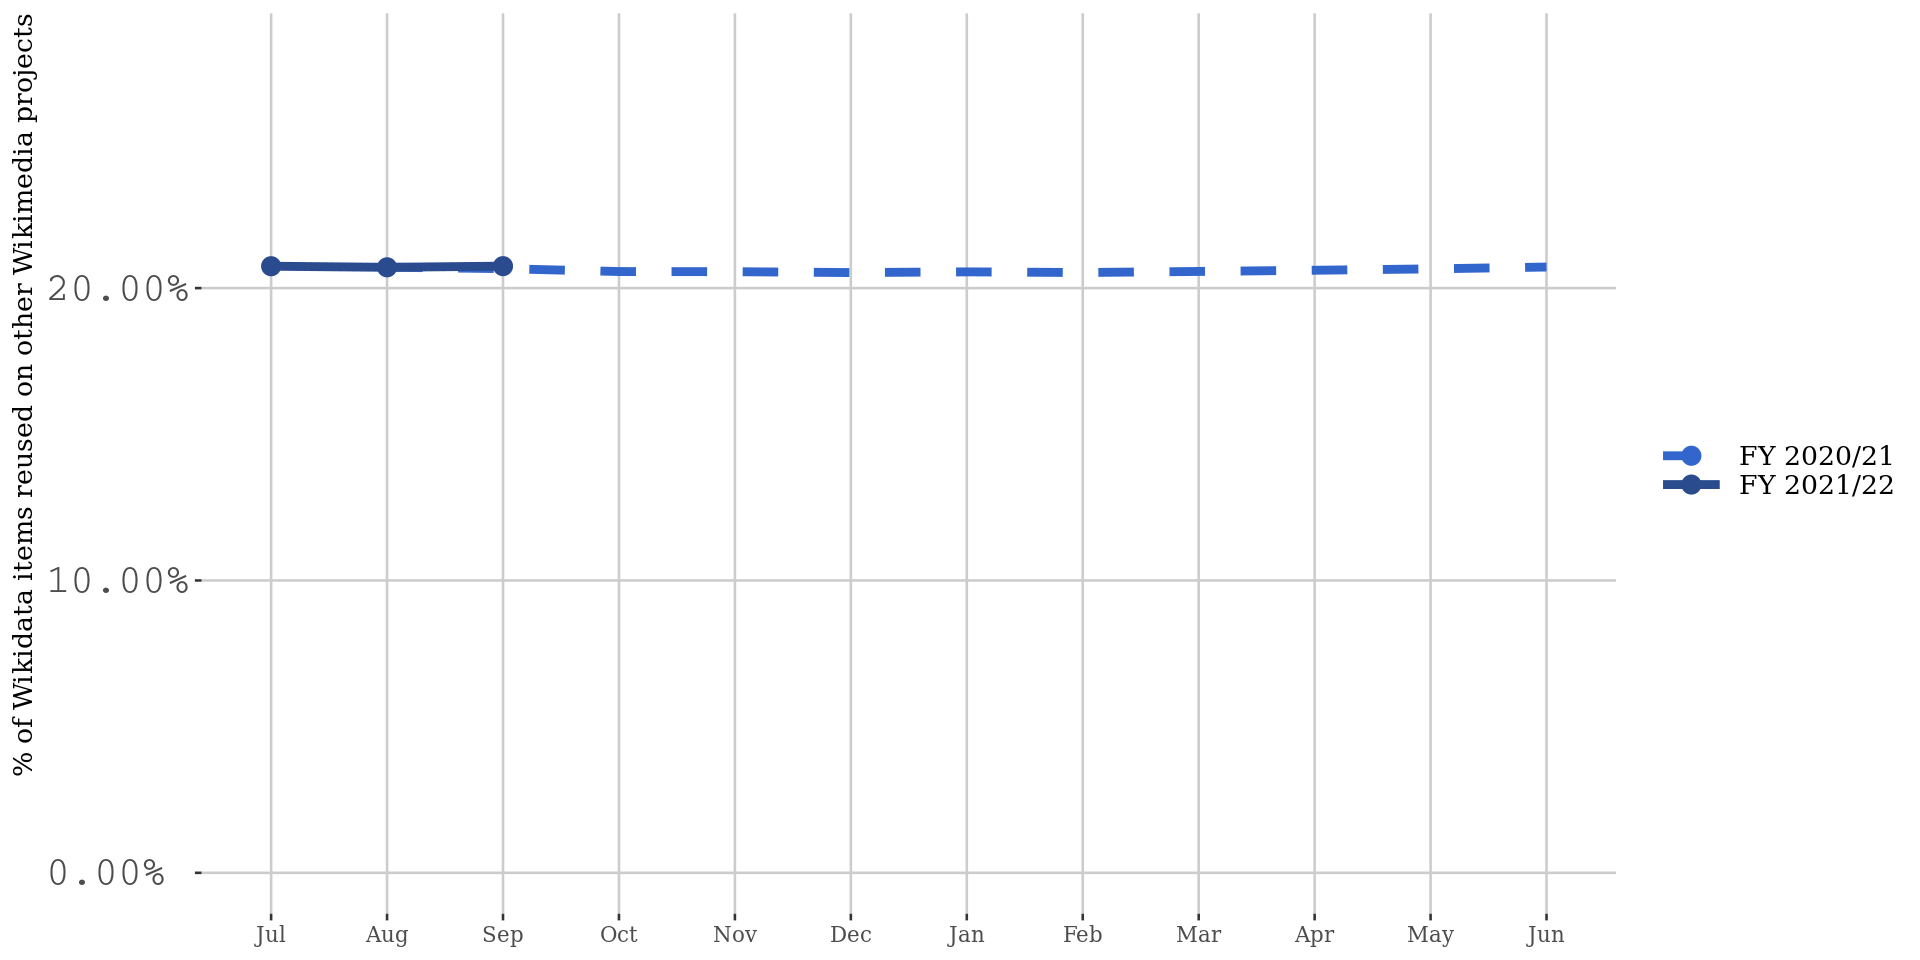

In [11]:
options(repr.plot.width = 16, repr.plot.height = 8)

p<- wd_fy %>%
    ggplot(aes(x = MonthN)) +
    geom_line(aes(x = MonthN, 
                  y = per, 
                  group=fiscal_year, 
                  color = fiscal_year,
                  size=fiscal_year,
                  linetype = fiscal_year)) +
    geom_point(aes(x = MonthN, 
                   y = per,
                   color = fiscal_year
                  ),
                   size = 5,
                   data = filter(wd_fy, fiscal_year =="FY 2021/22")
                   #color ="#80288a" ##2a4b8d"
              ) + 
    scale_linetype_manual(values=c(#"FY 2019/20" = "twodash", 
                                   "FY 2020/21" = "dashed", "FY 2021/22" ="solid")) +
    scale_size_manual(values = c(2.5,2.5,2.5)) +
    scale_color_manual(values = c(#"FY 2019/20"= "#b1c4eb", 
                                  "FY 2020/21" = "#3366cc","FY 2021/22" = "#2a4b8d")) +
    scale_x_discrete("Month",
                      breaks = wd_fy$MonthN, 
                     labels = wd_fy$Month) +
    scale_y_continuous("% of Wikidata items reused on other Wikimedia projects",
                       labels = scales::percent_format(accuracy = 0.01),
                       limits = c(0,0.28)) +
    ggthemes::theme_tufte(base_size = 16,base_family = "serif") +
     theme(axis.text.y=element_text( hjust = 0,size = 24,family="Courier"),
          axis.title.x=element_blank(),
          panel.grid = element_line("gray80"),
          plot.title = element_text(size = 20,hjust = 0,face= "bold"),
          axis.title=element_text(size=16,hjust = 1),
          legend.position = "right", 
          panel.grid.minor.y = element_blank(),
          legend.title = element_blank(),
          legend.text =element_text( hjust = 0.5,size = 16),
          legend.key.width=unit(1.5,"cm"))
  

#ggsave(filename="Pageviews_monthly_yoy2.png", plot = p, path = 'Figures', units = "in", dpi = 192, height = 6, width = 14, limitsize = FALSE)  
p